In [1]:
import torch
import torch.nn as nn # Neaural network
import torch.nn.functional as F

In [2]:
# find the cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
class Model(nn.Module): # Propogation
    def __init__(self, in_features=4, # how many layers coming in (Features)
                 h1=8,
                 h2=9,
                 out_features=3,
                 device=device
                 ):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1) # Fully connectivity layer
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x)) # Activation function
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [4]:
# instantiate model
torch.manual_seed(32)
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./Data/Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df['Species'].unique() # checking how many out features we have

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df['target'] = df['Species'].map({ # map helps to give the target
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
})

In [10]:
df['target'].unique()

array([0, 1, 2], dtype=int64)

In [11]:
# Species removed from df
if 'Id' in df.columns:
    df.drop(columns=['Id'],axis=1,inplace=True)
if 'Species' in df.columns:
    df.drop(columns=['Species'],axis=1,inplace=True)

In [12]:
df.tail(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
149,5.9,3.0,5.1,1.8,2


AttributeError: 'function' object has no attribute 'legend_elements'

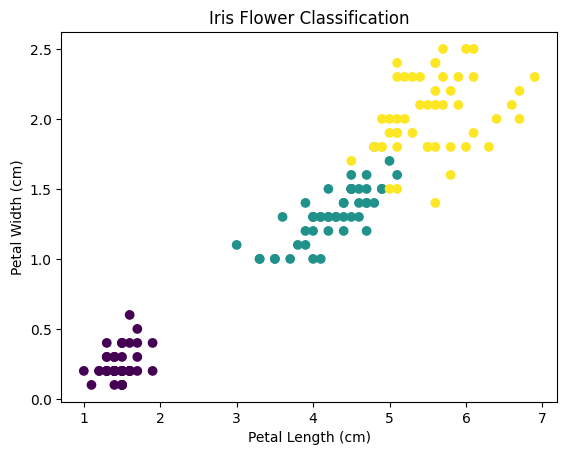

In [14]:
# Create a plot with matplotlib
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['target'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Flower Classification')

# Add legend
legend_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.legend(handles=plt.scatter.legend_elements()[0], labels=legend_labels)

plt.colorbar()
plt.show()

In [15]:
X = df.drop('target', axis=1)
y = df['target']

In [16]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
type(y)

pandas.core.series.Series

In [18]:
# convert to numpy arrays
X = X.values
y = y.values

In [19]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=33)

In [23]:
# convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [24]:
print(X_test[0:3])
print(y_test[0:3])

tensor([[5.7000, 2.9000, 4.2000, 1.3000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [4.7000, 3.2000, 1.6000, 0.2000]])
tensor([1, 1, 0])


In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=0.01)

In [26]:
# EPOCHS
# AN epoch, 1 run through all the training data

epochs = 100
losses = []
for i in range(epochs):
    # Forward a get a prediction
    y_pred = model.forward(X_train)
    # Calculate loss/error
    loss = criterion(y_pred,y_train)
    #append the losses
    losses.append(loss)
    
    if i%10==0:
        print(f"Epoch {i} and loss is {loss}")
        
    # Backpropogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch 0 and loss is 1.1507114171981812
Epoch 10 and loss is 0.9377315640449524
Epoch 20 and loss is 0.7798256278038025
Epoch 30 and loss is 0.6099399924278259
Epoch 40 and loss is 0.40079933404922485
Epoch 50 and loss is 0.25436317920684814
Epoch 60 and loss is 0.15053053200244904
Epoch 70 and loss is 0.10086944699287415
Epoch 80 and loss is 0.08128314465284348
Epoch 90 and loss is 0.07231427729129791


In [27]:
losses

[tensor(1.1507, grad_fn=<NllLossBackward0>),
 tensor(1.1167, grad_fn=<NllLossBackward0>),
 tensor(1.0874, grad_fn=<NllLossBackward0>),
 tensor(1.0642, grad_fn=<NllLossBackward0>),
 tensor(1.0432, grad_fn=<NllLossBackward0>),
 tensor(1.0236, grad_fn=<NllLossBackward0>),
 tensor(1.0052, grad_fn=<NllLossBackward0>),
 tensor(0.9890, grad_fn=<NllLossBackward0>),
 tensor(0.9739, grad_fn=<NllLossBackward0>),
 tensor(0.9566, grad_fn=<NllLossBackward0>),
 tensor(0.9377, grad_fn=<NllLossBackward0>),
 tensor(0.9185, grad_fn=<NllLossBackward0>),
 tensor(0.9004, grad_fn=<NllLossBackward0>),
 tensor(0.8845, grad_fn=<NllLossBackward0>),
 tensor(0.8706, grad_fn=<NllLossBackward0>),
 tensor(0.8555, grad_fn=<NllLossBackward0>),
 tensor(0.8389, grad_fn=<NllLossBackward0>),
 tensor(0.8222, grad_fn=<NllLossBackward0>),
 tensor(0.8064, grad_fn=<NllLossBackward0>),
 tensor(0.7924, grad_fn=<NllLossBackward0>),
 tensor(0.7798, grad_fn=<NllLossBackward0>),
 tensor(0.7679, grad_fn=<NllLossBackward0>),
 tensor(0.

In [28]:
len(losses)

100

In [29]:
losses_np = [loss.detach().numpy() for loss in losses]

Text(0.5, 0, 'Epoch')

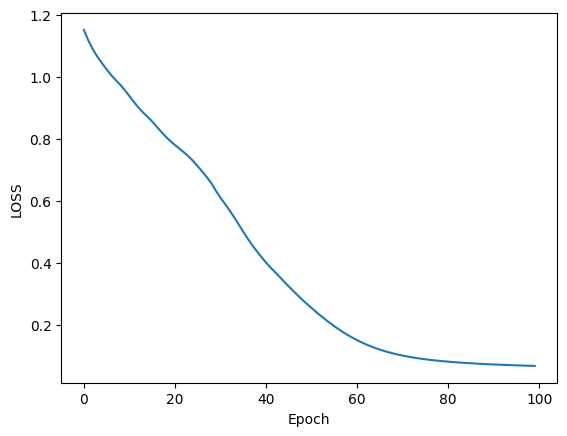

In [30]:
plt.plot(range(epochs),losses_np)
plt.ylabel('LOSS')
plt.xlabel('Epoch')
# Errors gone down

In [31]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [32]:
loss

tensor(0.0581)

In [37]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f"{i+1}.) {str(y_val)} {y_test[i]}")
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            
print(f"We got {correct} correct!")

1.) tensor([-2.1252,  4.8064, -0.8628]) 1
2.) tensor([-1.7985,  5.3098, -1.5449]) 1
3.) tensor([  6.3542,   0.8438, -10.0541]) 0
4.) tensor([-3.9123,  4.5958,  1.1693]) 1
5.) tensor([-7.4713,  3.2021,  5.7853]) 2
6.) tensor([-10.4976,   1.6459,   9.6297]) 2
7.) tensor([  6.3201,   0.9917, -10.1532]) 0
8.) tensor([  7.0468,   0.7059, -10.9137]) 0
9.) tensor([-7.2061,  3.3477,  5.3565]) 2
10.) tensor([-9.3960,  2.5759,  8.1033]) 2
11.) tensor([-9.8808,  2.3475,  8.7141]) 2
12.) tensor([ 6.2748,  0.6655, -9.7613]) 0
13.) tensor([-9.3142,  2.1880,  8.1947]) 2
14.) tensor([-3.7803,  4.5050,  1.0752]) 1
15.) tensor([-7.8657,  3.0117,  6.2303]) 2
16.) tensor([-1.8867,  5.1572, -1.3345]) 1
17.) tensor([-5.7006,  3.5030,  3.6696]) 2
18.) tensor([  7.1789,   0.7369, -11.1350]) 0
19.) tensor([-3.2944,  4.7931,  0.3475]) 1
20.) tensor([-7.7665,  3.7629,  5.7095]) 2
21.) tensor([  6.6499,   0.7889, -10.4252]) 0
22.) tensor([  7.4357,   0.8918, -11.6600]) 0
23.) tensor([-9.7584,  2.1744,  8.6654]) 2

In [38]:
import numpy as np
arr = np.array([[1,2],[3,4]])

In [42]:
print(arr.argmax().item()) # index
print(arr.max().item()) # item

3
4


In [43]:
# Save the model
torch.save(model.state_dict(), 'my_iris_model.pt')

In [44]:
# Load the model
new_model = Model() # ?? W or B
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [45]:
new_model.eval()  # Check the model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [46]:
# Check with a new data : mystery
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

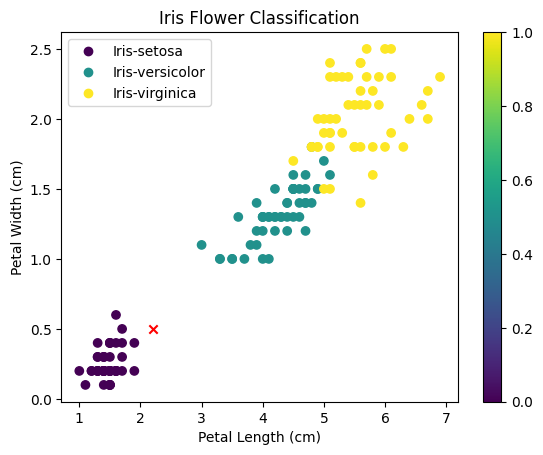

The mystery flower belongs to category: Iris-setosa


In [51]:
import torch
import matplotlib.pyplot as plt

# Make a graph with our old diagram which category
# mystery flower belongs to

# Get the predicted category for the mystery flower
with torch.no_grad():
    mystery_pred = new_model.forward(mystery_iris)
    category = mystery_pred.argmax().item()

# Plot the graph
scatter = plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['target'])
plt.scatter(mystery_iris[2], mystery_iris[3], c='red', 
            marker='x', label='Mystery Flower')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Flower Classification')

# Add legend
legend_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=legend_labels)

plt.colorbar()
plt.show()

# Print the predicted category
print(f"The mystery flower belongs to category: {legend_labels[category]}")